# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .. 

Obtaining file:///Users/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.12.3-0.editable-py3-none-any.whl size=3592 sha256=8fc862275b9bad6f3c821f7d1f69434716c71a8ce9440b40a2fc79053f9dcda2
  Stored in directory: /private/var/folders/gf/f2gq1g_97yl5m14bd6t4chm80000gp/T/pip-ephem-wheel-cache-tq_931b2/wheels/7b/f0/6f/e5a0e81d9f5259d8dd15015bc30fcbb2ed08e174606e4fc43b
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.12.3
    Uninstalling pywebtask-0.12.3:
      Successfully uninstalled pywebtask-0.12.3

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.google import GeminiLLM

wt = Webtask()
# GeminiLLM will automatically read GOOGLE_API_KEY from environment
llm = GeminiLLM.create(model="gemini-2.5-flash")

/Users/stevewang/Github/web-auto/webtask/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent
agent = await wt.create_agent(llm=llm)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


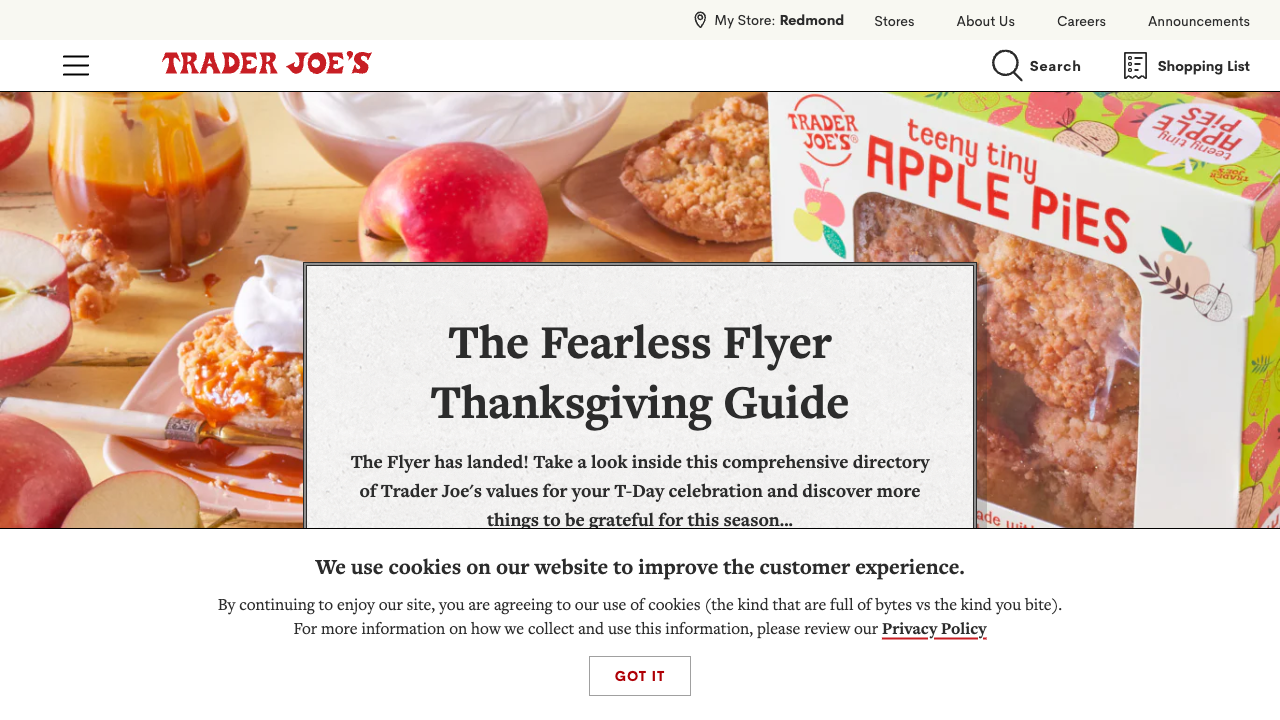

In [5]:
# Navigate to the starting page first
await agent.navigate("https://www.traderjoes.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent autonomously to add items to the shopping cart and print the complete result.

In [6]:
# Execute the task autonomously
result = await agent.execute(
    "Find the store location and hours of the closest Trader Joe's to zip code 90028 and set it as my home store",
    max_cycles=10
)

# Print the complete task result
print(result)

TASK EXECUTION
Task: Find the store location and hours of the closest Trader Joe's to zip code 90028 and set it as my home store
Status: aborted
Abort Reason: The functionality to 'set as my home store' is not available on the Trader Joe's website, as confirmed by the verifier feedback. Therefore, the task cannot be fully completed.

SUBTASK QUEUE:
--------------------------------------------------------------------------------
    0. ✅ Search for the closest Trader Joe's to zip code 90028. [complete] - Successfully searched for and found the closest Trader Joe's to zip code 90028. The results are displayed on the page, with 'Hollywood (206)' being the closest at 0.06 miles.
    1. ✅ Extract the store location and hours for the closest Trader Joe's to 90028. [complete] - The store location is: 1600 N Vine St, Los Angeles, CA 90028. The store hours are: Monday-Sunday, 9AM - 9PM.
  → 2. ⚠️ Set the closest Trader Joe's to 90028 as the home store. [requested_reschedule] - The worker has su

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


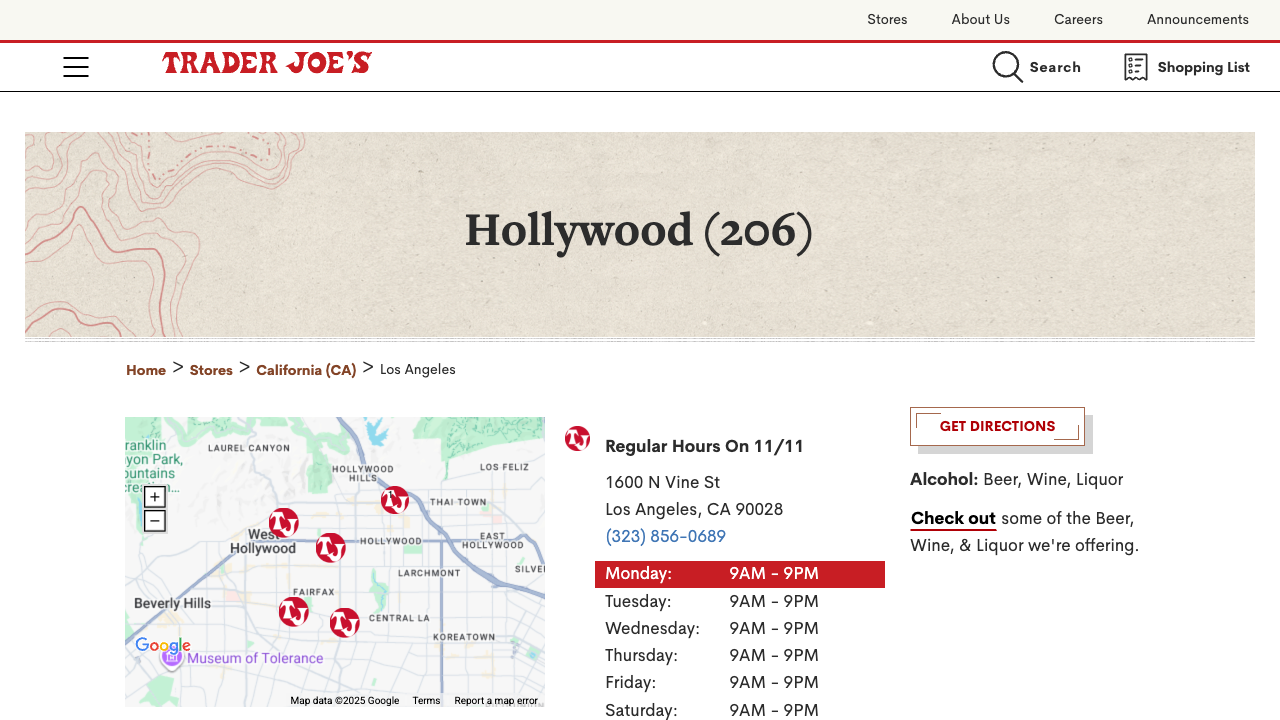

In [7]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))